<a href="https://colab.research.google.com/github/RafaelAnga/Bootcamp_AI_BIT/blob/main/S2_C3_RDG_Marketting_target_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas
from statsmodels.tools.tools import add_constant # Helps to use the add_constant library

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os #libreria necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Bootcamp AI/DataSetClean')

os.listdir()

['marketing_extract_2X_Income.xlsx']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


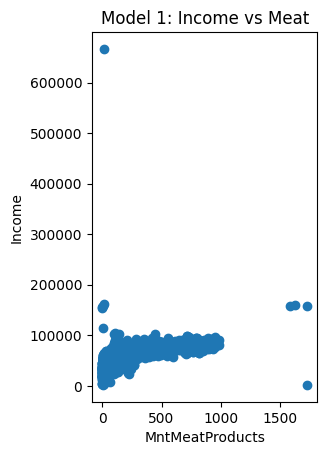

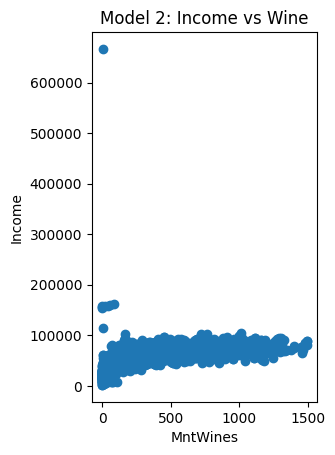

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.title('Model 1: Income vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()


plt.subplot(1, 2, 2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2: Income vs Wine')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()



In [ ]:
#How to find Inter Quartile Range
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ in boolean, represents negation
# | represents the OR
# & represents AND
# This is used to remove the outliers
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
#How to find Inter Quartile Range
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ in boolean, represents negation
# | represents the OR
# & represents AND
# This is used to remove the outliers
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

In [ ]:
#How to find Inter Quartile Range
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ in boolean, represents negation
# | represents the OR
# & represents AND
# This is used to remove the outliers
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

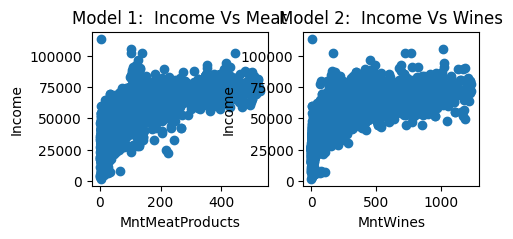

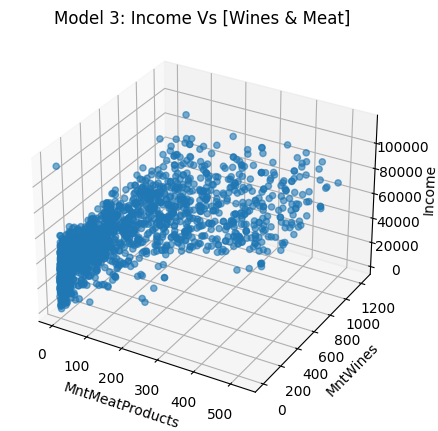

In [ ]:

# subplot (filas, columnas, posicion)
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()


In [ ]:
df = df[df['Income']<90000]


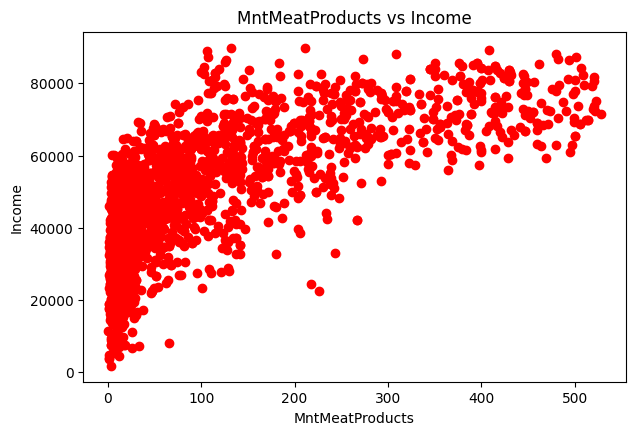

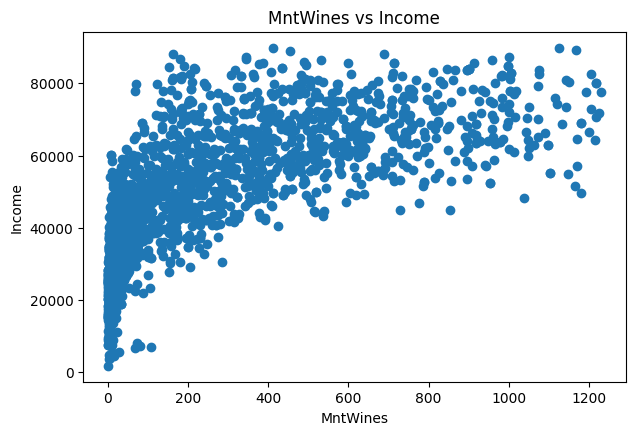

In [ ]:
plt.figure(figsize=(7,10))
# subplot (filas, columnas, posicion)
plt.subplot(2,1,1)
plt.scatter(df['MntMeatProducts'],df['Income'], color='red')
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(7,10))
plt.subplot(2,1,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# 2. Inicializacion de parametros

In [ ]:
theta = 80
intercept = 5000

# 3 Una Iteracion RGD

In [ ]:
# y = b + mx
# h = b + theta(X1)
# h = theta_0 + theta_1
df['Hipotesis'] = intercept + theta*df['MntMeatProducts']

In [ ]:
df.head(5)

,MntMeatProducts,MntWines,Income,Hipotesis
1,6,11,46344,5480
2,127,426,71613,15160
3,20,11,26646,6600
4,118,173,58293,14440
5,98,520,62513,12840


In [ ]:
df

,MntMeatProducts,MntWines,Income,Hipotesis
1,6,11,46344,5480
2,127,426,71613,15160
3,20,11,26646,6600
4,118,173,58293,14440
5,98,520,62513,12840
...,...,...,...,...
2211,182,709,61223,19560
2212,30,406,64014,7400
2213,217,908,56981,22360
2214,214,428,69245,22120


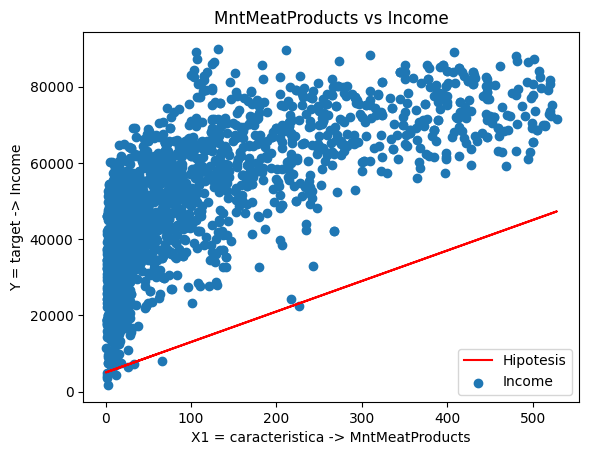

In [ ]:
plt.plot(df['MntMeatProducts'], df['Hipotesis'], color='red')
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.legend(['Hipotesis', 'Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('X1 = caracteristica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.show()


In [ ]:
#Calcule el error cuadratico medio MSE = cost = lost
# MSE = ((h-y)^2)/m
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print(f"El error cuadratico medio es: {round(MSE,2)}")

El error cuadratico medio es: 1372433314.82


In [ ]:
MSE

#Actualizar *parametros*

In [ ]:
theta_0 = intercept
theta_1 = theta
alpha = 0.00001 #Este valor es entre 0 y 1


In [ ]:
theta_0

5000

In [ ]:
#Actualizacion de theta 0
theta_0 = theta_0 - alpha * (2/m) * np.sum((h-Y))
theta_0

5000.690381471334

# Visualice la nueva recta

In [ ]:
#Actualizacion de Theta 1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h-Y))
theta_1

163.18958407914764

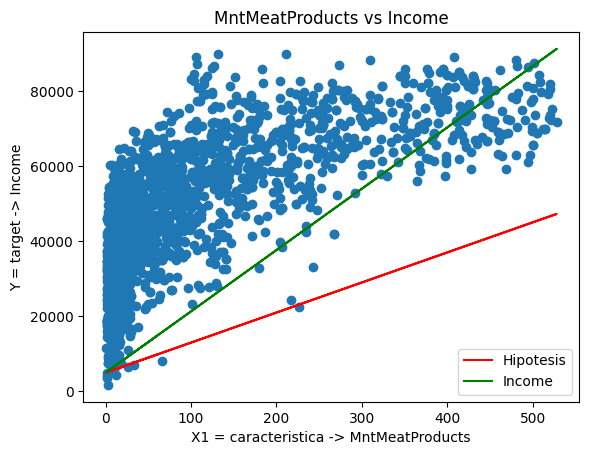

In [ ]:
# Visualice la nueva recta

H_new = theta_0 + theta_1*X1
plt.plot(df['MntMeatProducts'], df['Hipotesis'], color='red')
plt.plot(df['MntMeatProducts'], H_new, color='green')
plt.scatter(df['MntMeatProducts'], df['Income'])
plt.legend(['Hipotesis', 'Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('X1 = caracteristica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.show()

In [ ]:
#Calcule la bondad de ajuste (R^2) or R2_score
# SSE => La suma del error cuadratico medio
## SST => Suma de differencias al cuadrado entre los valores observados y
#la media de los valores observados
Y_mean = np.mean(Y)
SSE = np.sum((H_new-Y)**2)
SST = np.sum((Y-Y_mean)**2)
R2 = 1 - (SSE/SST)
R2



-1.466819346349276

In [ ]:
theta = np.random.randn(2,1)
theta

array([[0.69137511],
       [0.93651908]])

# New Section

# Realize un ciclo para n-iteraciones

In [ ]:
# DataSet

#Target
Y= df['Income']

#Characteritica
X1 = df['MntMeatProducts']

#Hiperparametros
n_iteraciones = 100
alpha = 0.00001 #Este valor es entre 0 y 1



In [ ]:
#inicializar parametros


def mi_RGD(Y, X1, alpha, n_iteraciones):
  theta = np.random.randn(2,1)
  X1 = add_constant(X1)
  for i in range(n_iteraciones):
    H = np.dot(X1,theta)




# Actividad 5.1